# scCODEX preview - Clustering

In [2]:
#import standard packages
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import scipy as sp
import anndata as ad

sys.path.append('/Users/timnoahkempchen/Desktop/SAP5/src') # This code is only needed if you want to load functions from a non-default directory

from helperfunctions_hf import * # Helper functions - used by other functions to execute steps like table formatting etc. KEY: hf
from preprocessing_pp import * # Preprocessing functions - to normalize and prepare data for further analysis KEY: pp
from tools_tl import * # tools - perform calculation on the data KEY: tl
from plot_pl import * # plotting functions - used to visualize results KEY: pl

In [3]:
input_dir = '/Users/timnoahkempchen/Library/CloudStorage/GoogleDrive-timkem@stanford.edu/Meine Ablage/SAP_figures/New_segmented_dataset/Output_preprocessing/'

In [15]:
# load the anndata object from the file
adata = ad.read_h5ad("/Users/timnoahkempchen/Downloads/adata_nn_demo_hubmap_intestine_20231014.h5ad")

/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [92]:
# no need to reassign the adata
markers_for_clustering = ['MUC2', 'SOX9', 'MUC6', 'MUC1', 'CD31', 'Synapto', 'CD49f',
       'CD15', 'CHGA', 'CDX2', 'CD4', 'CD127', 'Vimentin', 'HLADR',
       'CD8', 'CD11c', 'CD44', 'CD16', 'CD3', 'CD123', 'CD38', 'CD90',
       'CD279', 'aSMA', 'CD21', 'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68',
       'CD34', 'aDef5', 'CD7', 'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CK7',
       'CollIV', 'CD117', 'PGP95', 'CD19', 'Podoplanin', 'CD45', 'CD56',
       'CD69', 'CD154', 'Somatostatin', 'CD163', 'CD161', 'CD294']

In [93]:
tl_clustering(adata, 
              clustering='leiden', # can choose louvian
              n_neighbors=10,
              res = 1,
              reclustering = False, # if true, no computing the neighbors
              markers_for_clustering = markers_for_clustering) 

Computing neighbors and UMAP
Clustering


/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


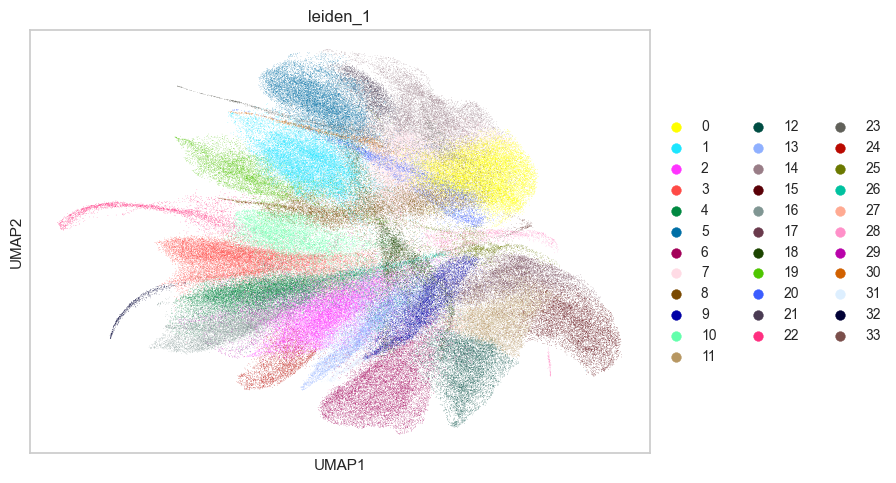

In [94]:
# visualization of clustering with UMAP
sc.pl.umap(adata, color = 'leiden_1') 

/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


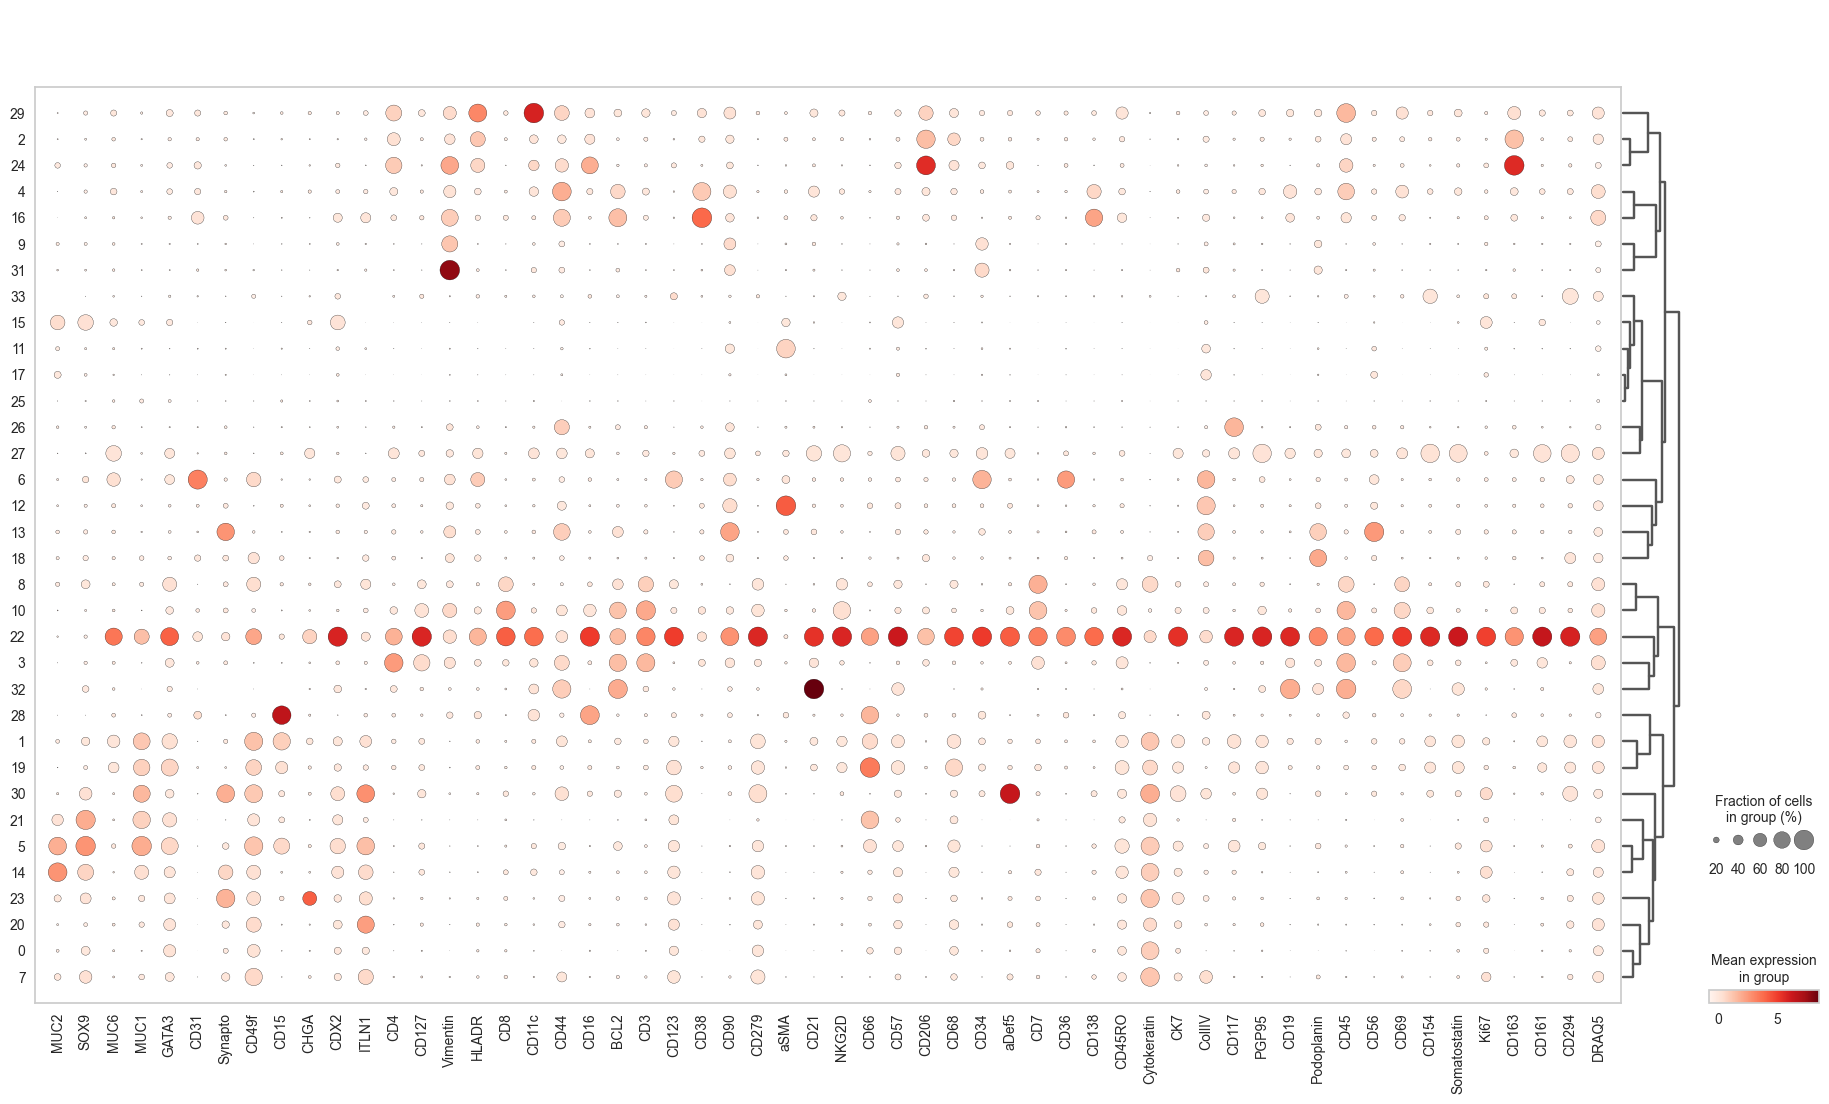

In [95]:
sc.pl.dotplot(adata, adata.var.index.to_list(), 'leiden_1', dendrogram = True)

Computing neighbors
Clustering


/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


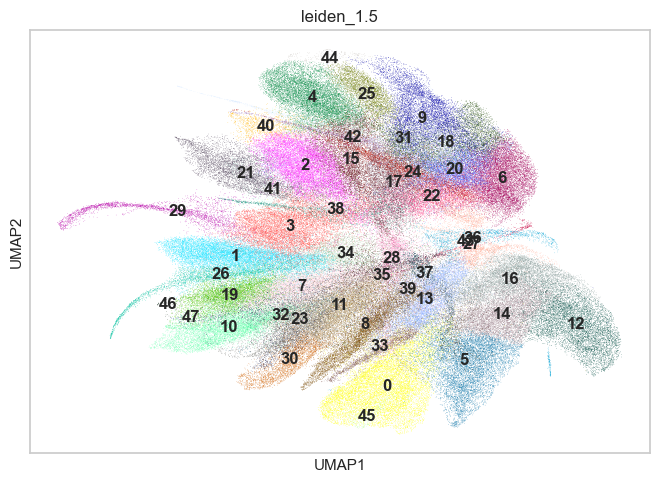

In [96]:
#reclustering with different resolution
tl_clustering(adata, 
              clustering='leiden', # can choose Louvain
              n_neighbors=10,
              res = 1.5,
              reclustering = True, # if true, no recomputing the neighbors
              markers_for_clustering = markers_for_clustering)
sc.pl.umap(adata, color = 'leiden_1.5', legend_loc="on data")

Computing neighbors
Clustering


/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


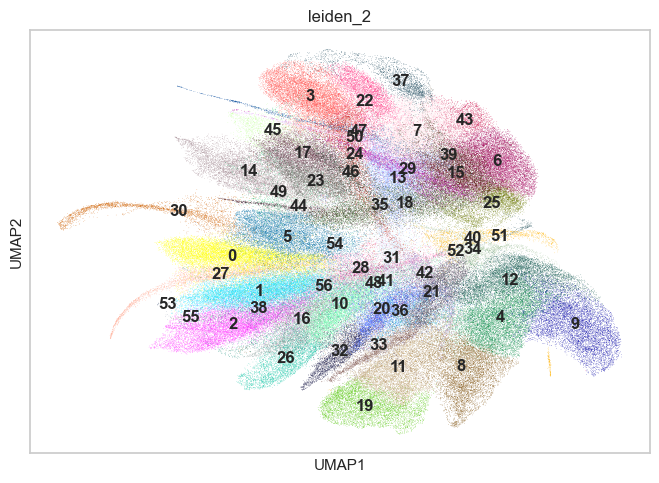

In [101]:
#reclustering with different resolution
tl_clustering(adata, 
              clustering='leiden', # can choose Louvain
              n_neighbors=10,
              res = 2,
              reclustering = True, # if true, no recomputing the neighbors
              markers_for_clustering = markers_for_clustering)
sc.pl.umap(adata, color = 'leiden_2', legend_loc="on data")

/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


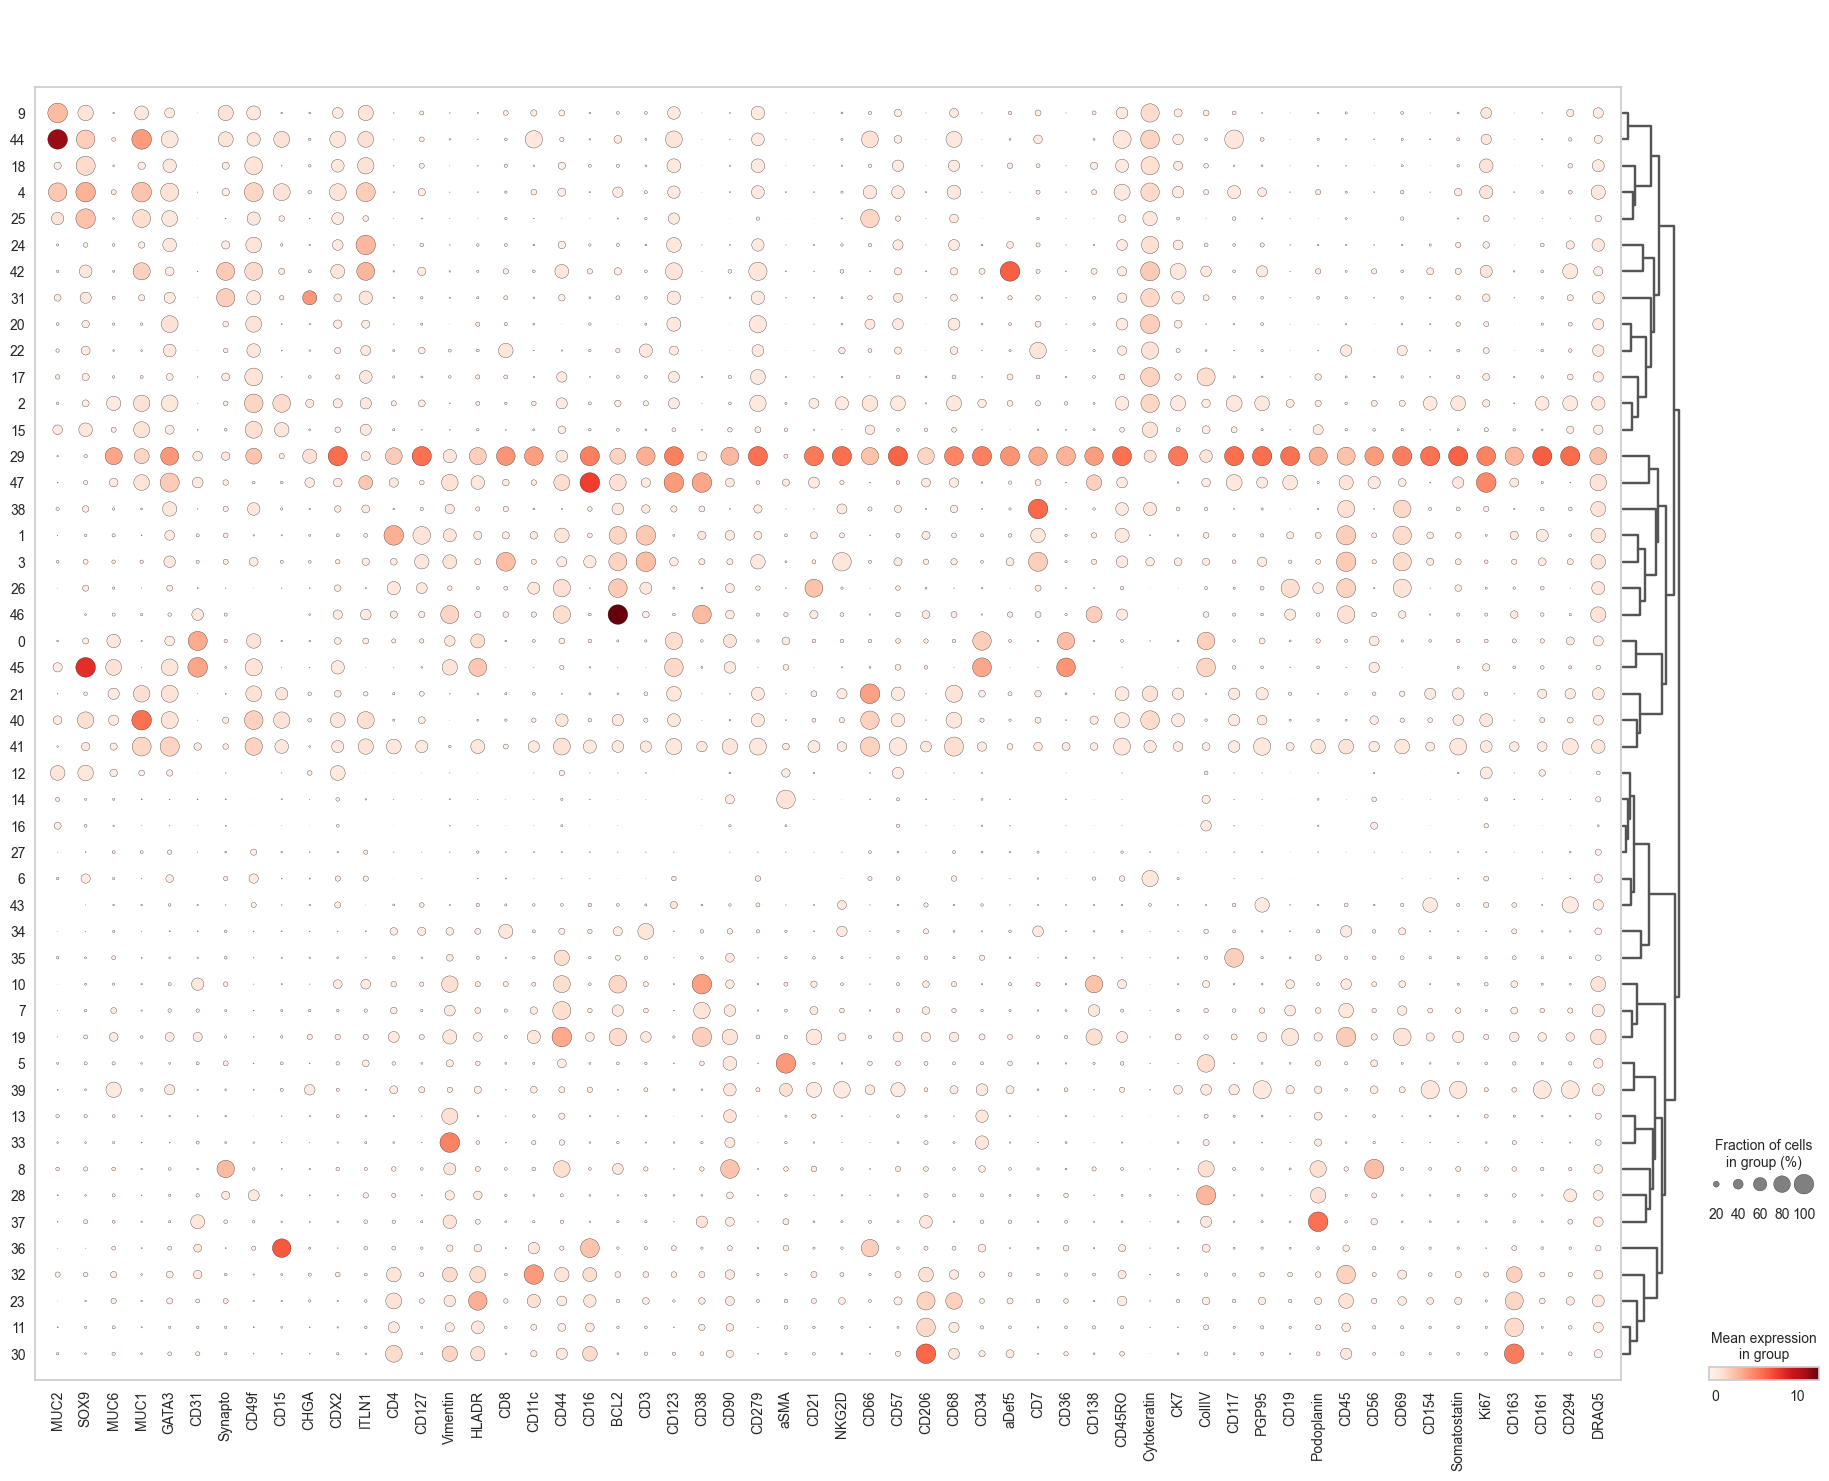

In [97]:
#look at the marker expression
sc.pl.dotplot(adata, adata.var.index.to_list(), 'leiden_1.5', dendrogram = True)

In [11]:
adata.write_h5ad(input_dir + 'adata_nn_demo_hubmap_intestine_20231014_subset_cluster_calc.h5ad')

In [ ]:
# Plot data using its original spatial coordinates
df_nn['leiden_0.4'] = adata.obs['leiden_0.4']
ax = sns.scatterplot(x='x', y='y', data=df_nn, hue='leiden_0.4', s=1, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()

In [104]:
old_to_new = {
    '0': 'Enterocyte',
    '1': 'Enterocyte',
    '2': 'M2 Macrophage',
    '3': 'CD4+ T cell',
    '4': 'Plasma',
    '5': 'MUC1+ Enterocyte',
    '6': 'Endothelial',
    '7': 'Paneth',
    '8': 'CD8+ T cell',
    '9': 'Stroma',
    '10': 'CD8+ T cell',
    '11': 'Smooth muscle',
    '12': 'Smooth muscle',
    '13': 'Nerve',
    '14': 'Goblet',
    '15': 'TA',
    '16': 'Plasma',
    '17': 'Unknown',
    '18': 'Lymphatic',
    '19': 'CD66+ Enterocyte',
    '20': 'Paneth',
    '21': 'MUC1+ Enterocyte',
    '22': 'Noise',
    '23': 'Neuroendocrine',
    '24': 'M2 Macrophage',
    '25': 'Unknown',
    '26': 'ICC',
    '27': 'NK',
    '28': 'Neutrophil',
    '29': 'DC',
    '30': 'Paneth',
    '31': 'Stroma',
    '32': 'B cell',
    '33': 'Unknown'
}
adata.obs['celltype'] = (
    adata.obs['leiden_1']
    .map(old_to_new)
    .astype('category')
)

In [ ]:
pl_mono_cluster_spatial(df=df_nn, sample_col='region_num', cluster_col='leiden_0.4', figsize=(20, 20))

## Sub-clustering

/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


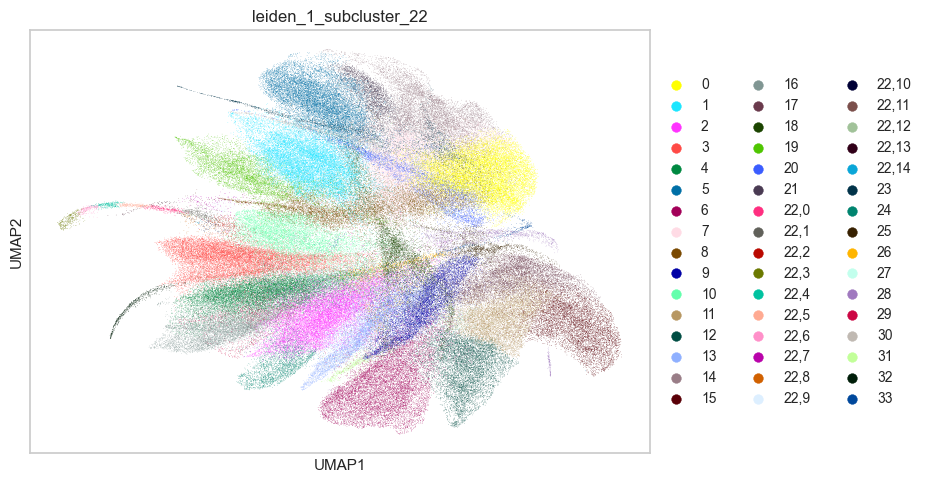

In [111]:
# subclustering cluster 0
sc.tl.leiden(adata, restrict_to=('leiden_1',['22']), resolution=1, key_added='leiden_1_subcluster_22')
sc.pl.umap(adata, color = 'leiden_1_subcluster_22')

/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


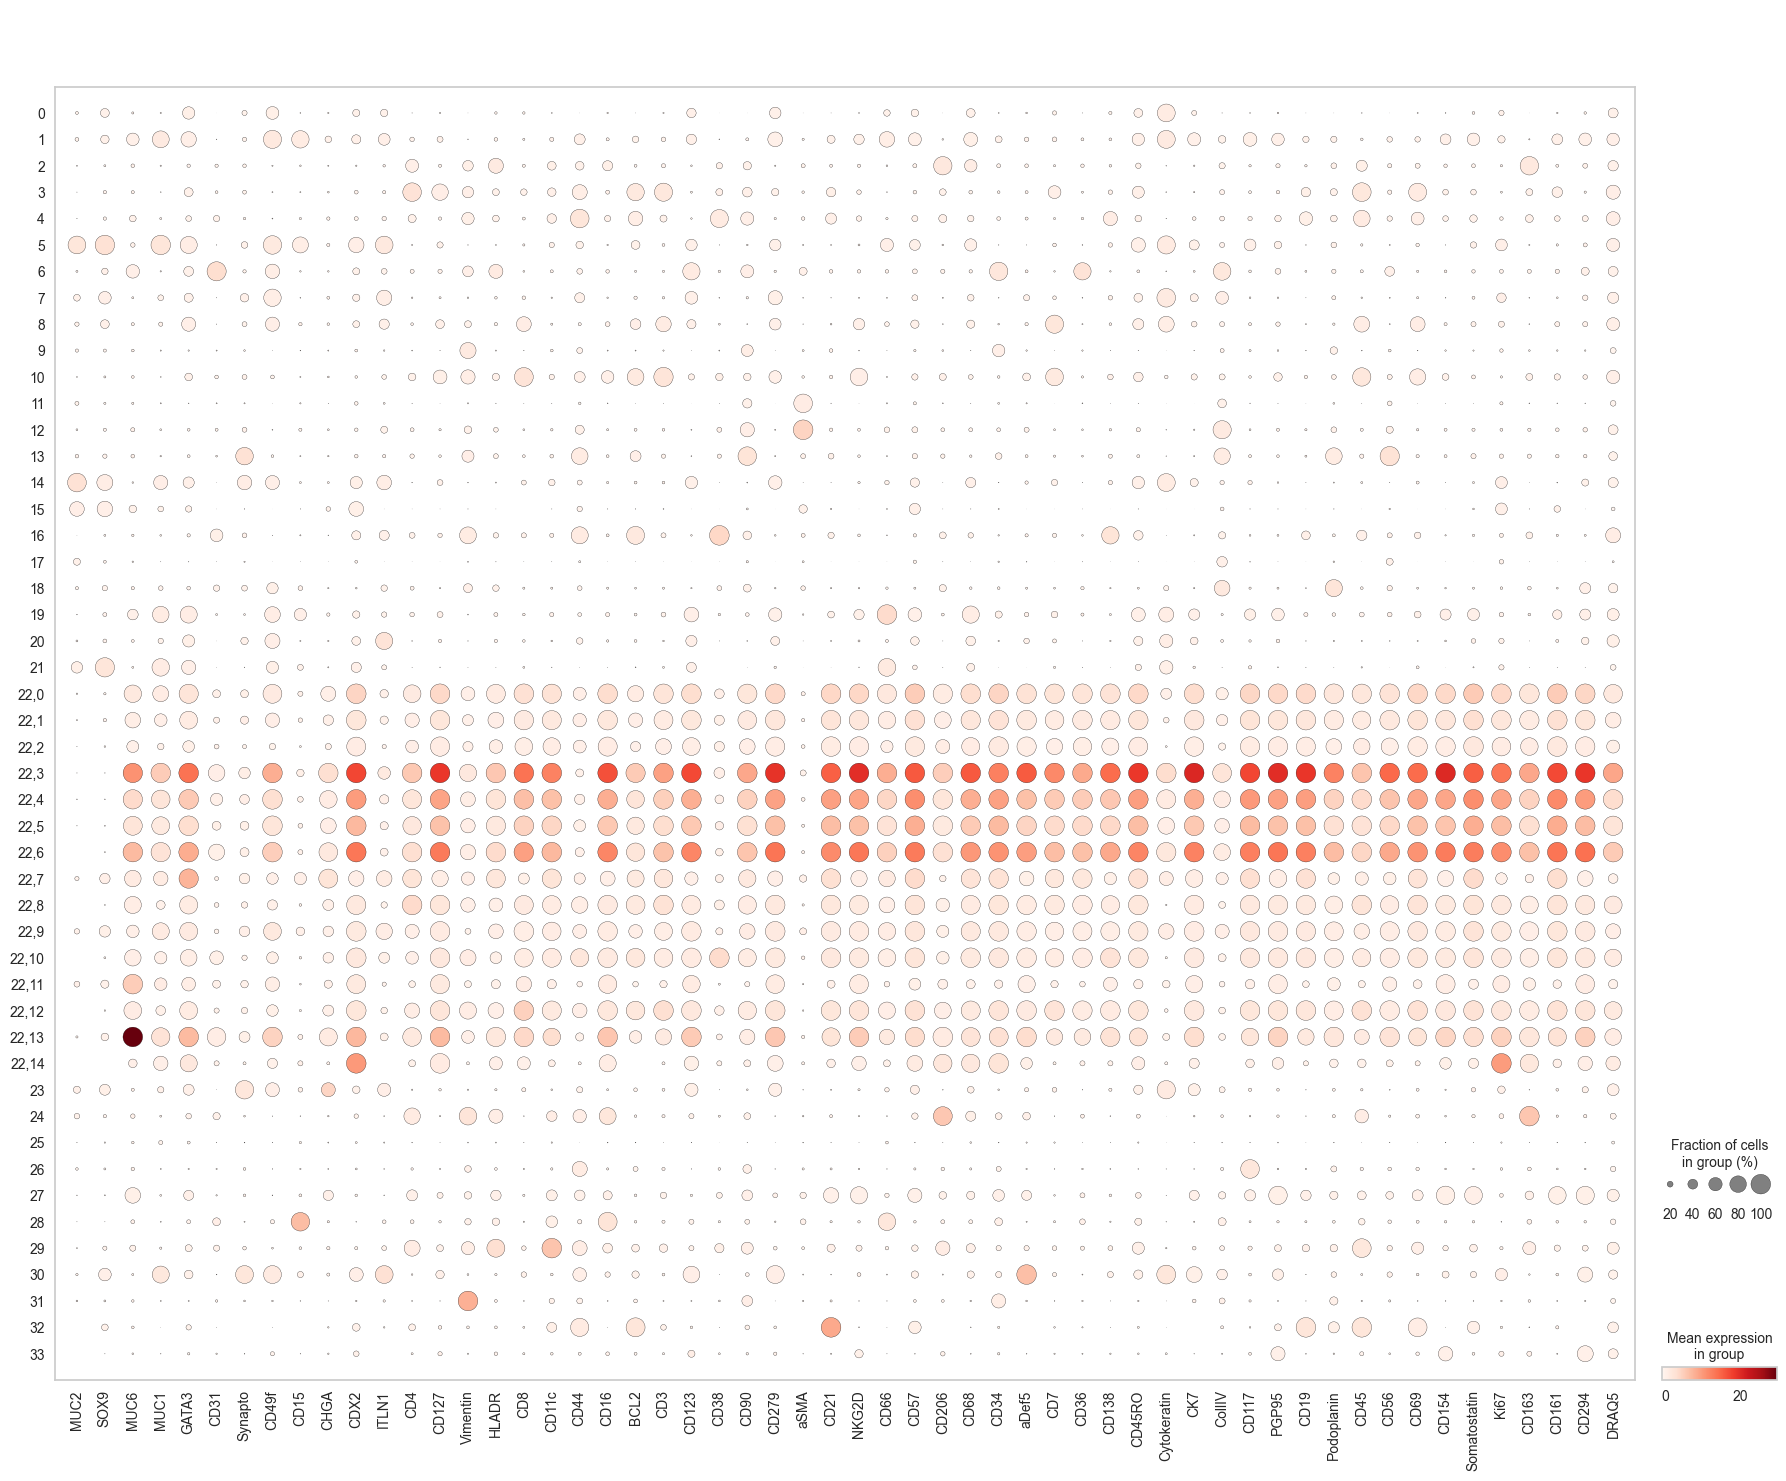

In [112]:
sc.pl.dotplot(adata, adata.var.index.to_list(), 'leiden_1_subcluster_22')

## Save anndata

In [ ]:
adata.write(output_dir+"NBT_230223_70129_adata.h5ad")